# **2 - Topic Modeling**

This notebook contains the code that runs LDA topic modeling to identify potential themes in the dataset.

**Requirements**: This notebook requires having installed the packages declared in the `requirements.txt` file. Please make sure to have followed the instructions provided in the `README.md` file before running it.

## **Model set up**

In [1]:
from utils import read_file
from ml_utils import *

In [2]:
# Creates vectorizer object with survey responses
data_dir = 'data'
data_filename = 'coded_response_dataframe.pkl'
survey_df = read_file(data_dir, data_filename)
X, vectorizer = responses_to_vectors(survey_df)

## **LDA Model training**

In [3]:
# Runs LDA Topic Modeling
lda_model, top20_theme_words_v1 = implement_lda(X, vectorizer)

iteration: 1 of max_iter: 500, perplexity: 841.3143
iteration: 2 of max_iter: 500, perplexity: 804.2784
iteration: 3 of max_iter: 500, perplexity: 793.3302
iteration: 4 of max_iter: 500, perplexity: 787.9393
iteration: 5 of max_iter: 500, perplexity: 784.7214
iteration: 6 of max_iter: 500, perplexity: 782.8458
iteration: 7 of max_iter: 500, perplexity: 781.6033
iteration: 8 of max_iter: 500, perplexity: 780.7591
iteration: 9 of max_iter: 500, perplexity: 780.0581
iteration: 10 of max_iter: 500, perplexity: 779.5089
iteration: 11 of max_iter: 500, perplexity: 779.0438
iteration: 12 of max_iter: 500, perplexity: 778.6424
iteration: 13 of max_iter: 500, perplexity: 778.3171
iteration: 14 of max_iter: 500, perplexity: 778.0494
iteration: 15 of max_iter: 500, perplexity: 777.7608
iteration: 16 of max_iter: 500, perplexity: 777.5593
iteration: 17 of max_iter: 500, perplexity: 777.3857
iteration: 18 of max_iter: 500, perplexity: 777.2322
iteration: 19 of max_iter: 500, perplexity: 777.0948
it

In [4]:
# Log Likelihood
print("Log Likelihood: ", lda_model.score(X))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(X))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -159148.0762361962
Perplexity:  776.8872951782104
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': 1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 500,
 'mean_change_tol': 0.001,
 'n_components': 5,
 'n_jobs': None,
 'perp_tol': 0.1,
 'random_state': 20,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 1}


In [9]:
# Dumps model artifacts into specified folder
model_filename = 'lda_model.joblib'
vectorizer_filename = 'vectorizer.joblib'
X_filename = 'X.joblib'
artifacts_dir ="artifacts/"

joblib.dump(X, os.path.join("../" + artifacts_dir, X_filename))
joblib.dump(vectorizer, os.path.join("../" + artifacts_dir, vectorizer_filename))
joblib.dump(lda_model, os.path.join("../" + artifacts_dir, model_filename))

['../artifacts/lda_model.joblib']

## **Themes visualization**

In [6]:
# Creates DataFrame visualizing the distribution of themes across documents
df_document_themes = create_theme_matrix(X, lda_model, survey_df)
df_document_styled = df_document_themes.head(15).style.applymap(color_green).applymap(make_bold)
df_document_styled

,Theme0,Theme1,Theme2,Theme3,Theme4,dominant_theme
Doc0,0.300000,0.290000,0.050000,0.310000,0.050000,3
Doc1,0.600000,0.100000,0.100000,0.100000,0.100000,0
Doc2,0.030000,0.030000,0.030000,0.870000,0.030000,3
Doc3,0.020000,0.690000,0.250000,0.020000,0.020000,1
Doc4,0.600000,0.100000,0.100000,0.100000,0.100000,0
Doc5,0.240000,0.040000,0.040000,0.440000,0.240000,3
Doc6,0.020000,0.820000,0.020000,0.020000,0.130000,1
Doc7,0.890000,0.030000,0.030000,0.030000,0.030000,0
Doc8,0.030000,0.030000,0.870000,0.030000,0.030000,2
Doc9,0.020000,0.620000,0.020000,0.200000,0.140000,1


In [7]:
# Theme distribution
theme_distribution = df_document_themes['dominant_theme'].value_counts(sort=True).reset_index(name="Num Documents")
theme_distribution.columns = ['Theme #', 'Num Documents']
theme_distribution

,Theme #,Num Documents
0,0,1123
1,3,957
2,2,899
3,4,878
4,1,751


<AxesSubplot:title={'center':'Ranking of theme clusters according to their dominance'}, xlabel='Theme #'>

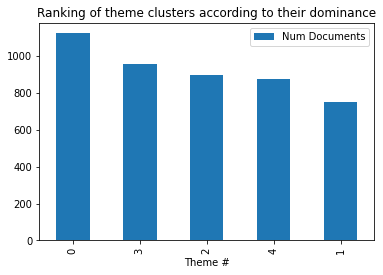

In [8]:
# Dominant Theme
theme_distribution.set_index(["Theme #"]).plot(
    kind="bar", title="Ranking of theme clusters according to their dominance")

## **Summary of findings**

### General insights
* Based on the results obtained by running Topic Modeling with LDA, we could do an exercise of manually interpreting the 5 different cluster themes as follows (sorted in descending order):
    * **Theme #0**: Trust in institutions (1,123 documents)
    * **Theme #3**: Healthcare plan (957 docuements)
    * **Theme #2**: Empathy (899 documents)
    * **Theme #4**: Contrasts with Trump (878 documents)
    * **Theme #1**: Follow the science (751 documents)

### Further improvements
* Despite the low corpus volume (just over 50k tokens), the model could benefit from hyperparameter tuning, since:
    * The hyperparameter `n_components` was chosen arbitrarily and might not be representative of the actual theme distribution
    * The log-likelihood value should be maximized and the perplexity value minimized as much as possible
    * Trying different `learning_rates` values might provide some insights into how the model converges